In [55]:
#https://github.com/nidhiwalia/bch5884
#Nidhi Walia
#Project3:Structural analysis of Sulfite Reductase Flavoprotein

#Importing numpy,matplotlib,scipy to plot graphs, biopython modules Bio.PDB to analyze protein files and nglview to visualize protein structures.
import numpy as np
from matplotlib import pyplot as plt
from scipy.signal import find_peaks
from Bio.PDB import *
import nglview as nv, pytraj as pt

#Retrieving PDB file from commmand line and cif will get downlaoded
pdbl = PDBList()
pdbl.retrieve_pdb_file('6EFV')

#Opening SEC files
f1=open("FP60-HP copy.txt")
f2=open("NFPSH.txt")
lines1=f1.readlines()
lines2=f2.readlines()
f1.close()
f2.close()


Structure exists: '/Users/nidhiwalia/bch_5884/Project3/ef/6efv.cif' 


In [56]:
#Parsing the downloaded cif file
parser = MMCIFParser()

In [57]:
#Using get_structure attribute, all the information will get stored in structure object.
structure = parser.get_structure('6EFV', 'ef/6efv.cif')


In [58]:
#using nglview to view structure of SiRFP
#ribbon structure for protein and ball and stick model (atom and bond) for non protein atoms.
view = nv.show_biopython(structure)
view.clear_representations()
view.add_cartoon('protein')
view.add_ball_and_stick('not protein')
view

NGLWidget()

In [29]:
#This will save the above image in downlaods 
view.render_image()
view._display_image()
view.download_image()

In [30]:
#Analyzing model in structure
print(f"model {model}")

model <Model id=0>


In [59]:
#Analyzing chains in models
model = structure[0] #since we only have one model
for chain in model:
    print(f"chain {chain}, Chain ID: {chain.id}")
    

chain <Chain id=A>, Chain ID: A


In [60]:
#Analyzing all the residues in chain A with chain ID
chain_A = model['A']
for res in chain_A:
    #print(f"Residue name: {res.resname}, number: {res.id[1]}")
    

SyntaxError: unexpected EOF while parsing (<ipython-input-60-d057a2a109a0>, line 5)

In [61]:
#Analyzing atoms of residue in chain (checking for 64 number residue)
res = chain_A[64]
print (res)
for atom in res:
    print(f"{atom.name}")

<Residue ILE het=  resseq=64 icode= >
N
CA
C
O
CB
CG1
CG2
CD1


In [63]:
#Analyzing all the atoms in the structure
for model in structure:
    for chain in model:
        for residue in chain:
            for atom in residue:
                #print(atom)

SyntaxError: unexpected EOF while parsing (<ipython-input-63-3e864e38fb31>, line 6)

In [64]:
#Converting mmcif file to dictionary and giving path to my file
#In order to find out binding residues of FMN and FAD 
struc_dict = MMCIF2Dict.MMCIF2Dict('ef/6efv.cif')
struc_dict['_struct_site.details']

['binding site for residue FAD A 601',
 'binding site for residue FMN A 602',
 'binding site for residue SO4 A 603',
 'binding site for residue SO4 A 604',
 'binding site for residue SO4 A 605',
 'binding site for residue SO4 A 606',
 'binding site for residue SO4 A 607',
 'binding site for residue SO4 A 608',
 'binding site for residue CXS A 609',
 'binding site for residue CXS A 610']

In [36]:
#Identifying the struture ids
struc_dict['_struct_site.id']


['AC1', 'AC2', 'AC3', 'AC4', 'AC5', 'AC6', 'AC7', 'AC8', 'AC9', 'AD1']

In [37]:
#Title for the paper
struc_dict['_citation.title']


['NADPH-dependent sulfite reductase flavoprotein adopts an extended conformation unique to this diflavin reductase.']

In [38]:
#Iterating over AC1 and AC2 to get, each id will have list of residues for the binding site
site_ID = struc_dict['_struct_site_gen.site_id']
site_chain = struc_dict['_struct_site_gen.auth_asym_id']
site_resnum = struc_dict['_struct_site_gen.auth_seq_id']
site_resname = struc_dict['_struct_site_gen.label_comp_id']


def getbindId(bindId):
    binding_residues=[]
    for bind_id, ch, num, name in zip(site_ID, site_chain, site_resnum, site_resname):
        if bind_id == bindId:
            print(bind_id, ch, num, name)
            try:
                binding_residues.append(structure[0][ch][int(num)])
            except:
                continue
        else:
            continue
    return binding_residues
cif_binding_residues = getbindId("AC1")
cif_binding_residues2 = getbindId("AC2")
#print(cif_binding_residues)


            

AC1 A 322 THR
AC1 A 323 VAL
AC1 A 356 ALA
AC1 A 386 ARG
AC1 A 387 LEU
AC1 A 388 TYR
AC1 A 389 SER
AC1 A 404 THR
AC1 A 406 GLY
AC1 A 410 TYR
AC1 A 419 GLY
AC1 A 420 GLY
AC1 A 421 ALA
AC1 A 422 SER
AC1 A 462 THR
AC1 A 597 ASP
AC1 A 599 TYR
AC1 A 728 HOH
AC1 A 772 HOH
AC1 A 774 HOH
AC1 A 776 HOH
AC1 A 791 HOH
AC1 A 803 HOH
AC1 A 809 HOH
AC1 A 822 HOH
AC1 A 833 HOH
AC1 A 872 HOH
AC1 A 914 HOH
AC1 A 918 HOH
AC2 A 70 SER
AC2 A 71 GLN
AC2 A 72 THR
AC2 A 73 GLY
AC2 A 74 ASN
AC2 A 75 ALA
AC2 A 117 SER
AC2 A 118 THR
AC2 A 119 GLN
AC2 A 120 GLY
AC2 A 121 GLU
AC2 A 122 GLY
AC2 A 154 GLY
AC2 A 155 ASP
AC2 A 158 TYR
AC2 A 160 PHE
AC2 A 161 PHE
AC2 A 162 CYS
AC2 A 753 HOH
AC2 A 824 HOH


In [39]:
#If you don't trust the above annotations for residues, you can create your own list of residues by setting a cut off
def domain(resname):
    for res2 in structure[0].get_residues():
        if res2.resname == resname:
            domain_name= res2
            break
    return domain_name
FMN=domain("FMN")
FAD=domain("FAD")
print(FMN)
print(FAD)

#step 1:finding the x,y,z coordinates of FMN and FAD (stating atom and last atom)
res_1_CA = structure[0]['A'][322]['CA']
res_1_CA_2=structure[0]['A'][70]['CA']
print(res_1_CA.coord)
print (res_1_CA_2.coord)


res_2_CA = structure[0]['A'][599]['CA']
res_2_CA_2 = structure[0]['A'][162]['CA']
print(res_2_CA.coord)
print(res_2_CA_2.coord)



<Residue FMN het=H_FMN resseq=602 icode= >
<Residue FAD het=H_FAD resseq=601 icode= >
[ 34.164 -53.971 -75.035]
[ 18.892 -16.197 -33.547]
[ 47.279 -43.163 -80.085]
[ 22.353  -5.272 -38.576]


In [40]:
#step2:finding difference between the coordinates and making distance a positive value
diff = res_1_CA.coord - res_2_CA.coord
diff2= res_1_CA_2.coord - res_2_CA_2.coord
print(diff)
print(diff2)
import numpy as np
dist = np.sqrt(diff * diff)
dist2 = np.sqrt(diff2 * diff2)

print(dist)
print(dist2)

[-13.114998  -10.808002    5.0499954]
[ -3.4610004 -10.925001    5.0289993]
[13.114998  10.808002   5.0499954]
[ 3.4610004 10.925001   5.0289993]


In [41]:
#step3:setting cut off 10 angstrom 
#defining function to loop over every residue of protein to check if it is close enough to FAD and FMN residue
 
cutoff = 10

def findResidue(domain_name):
    main_residues=[]
    for res in structure[0].get_residues():
        #skip the FAD residue, as we donot want the distance to itself
        if res == domain_name:
            continue
        #skip non-amino acid residues are tagged with an 'H' and 'W'in their id tuple
       
        elif res.id[0].startswith("H"):
            continue
        elif res.id[0].startswith("W"):
            continue
          
        else:
            alpha_carbon = res['CA']
        
            
            distances = []
            for atom in domain_name:
                #difference in two position vectors
                diff_vector = alpha_carbon.coord - atom.coord
        
                #to get a positive value we square the difference vector
                #we then take the square root to go back to the original scale
                distances.append(np.sqrt(np.sum(diff_vector * diff_vector)))
            #we get the nearest atom using min(distances) and see if it falls inside the cutoff
            if min(distances) < cutoff:
                main_residues.append(res)

    return main_residues
#finding residues for both FAD and FMN
binding_residues = findResidue(FAD)
binding_residues2 = findResidue(FMN)

#binding_residues will show all the binding residues of FAD
#binding_residues2 will show all the binding residues of FMN

#print(binding_residues)
#print(binding_residues2)

In [42]:
#setting the binding residues (FAD) to green in the visualization using hexadecimal color codes
#view = nv.demo()

view = nv.show_biopython(structure)
residues = structure[0].get_residues()

for r in residues:
    colors = ['0x0000FF' if r not in binding_residues else '0x00FF00' for r in residues]

view._set_color_by_residue(colors, component_index=0, repr_index=0)
view


NGLWidget()

In [43]:
#this will save the above image in downlaods
view.render_image()
view._display_image()
view.download_image()
#once image get downloaded,save it in png to use it further in webpage

In [44]:
#setting the binding residues (FMN) to red in the visualization using hexadecimal color codes
#view = nv.demo()

view = nv.show_biopython(structure)
residues = structure[0].get_residues()
colors = ['0x0000FF' if r not in binding_residues2 else '0xFF0000' for r in residues]

view._set_color_by_residue(colors, component_index=0, repr_index=0)
view

NGLWidget()

In [45]:
#this will save the above image in downlaods
view.render_image()
view._display_image()
view.download_image()
#once image get downloaded,save it in png to use it further in webpage

In [46]:
#Analyzing the SEC files for NFPSh and FP60-HP dimer

x1=[]
y1=[]
for line1 in lines1[3:]:
        words=line1.split()
        try:
                x1.append(float(words[0]))
                y1.append(float(words[1]))
        except:
                #print("Parsed the file",line)
                continue
#print(x1)
#Print(y1)

x2=[]
y2=[]
for line2 in lines2[3:]:
        words=line2.split()
        try:
                x2.append(float(words[0]))
                y2.append(float(words[1]))
        except:
                #print("Parsed the file",line)
                continue
#print(x2)
#Print(y2)

x1=np.array(x1)
y1=np.array(y1)
x2=np.array(x2)
y2=np.array(y2)

In [47]:
#finding peaks for both the chromatograms
threshold=75
peak_x1=[]
peak_y1=[]
peak_xy1=[]
index_peak1=[]
for i in range((len(y1))-1):
	p1=y1[i-1]
	q1=y1[i]
	r1=y1[i+1]
	if q1>=p1 and q1>=r1 and q1>threshold:
		peak_x1.append(x1[i])
		peak_y1.append(y1[i])
		peak_xy1.append((x1[i],y1[i]))
		index_peak1.append(i)

threshold=75
peak_x2=[]
peak_y2=[]
peak_xy2=[]
index_peak2=[]
for i in range((len(y2))-1):
	p2=y2[i-1]
	q2=y2[i]
	r2=y2[i+1]
	if q2>=p2 and q2>=r2 and q2>threshold:
		peak_x2.append(x2[i])
		peak_y2.append(y2[i])
		peak_xy2.append((x2[i],y2[i]))
		index_peak2.append(i)
        
print(peak_xy1)
print(peak_xy2)

if peak_x2<peak_x1:
    print("NFPSh has elution volume less than dimer so it is behaving as a octamer")
else:
    print("NFPSH is a monomer")

[(119.227394, 251.57254), (134.939102, 162.739014)]
[(101.274841, 417.466187)]
NFPSh has elution volume less than dimer so it is behaving as a octamer


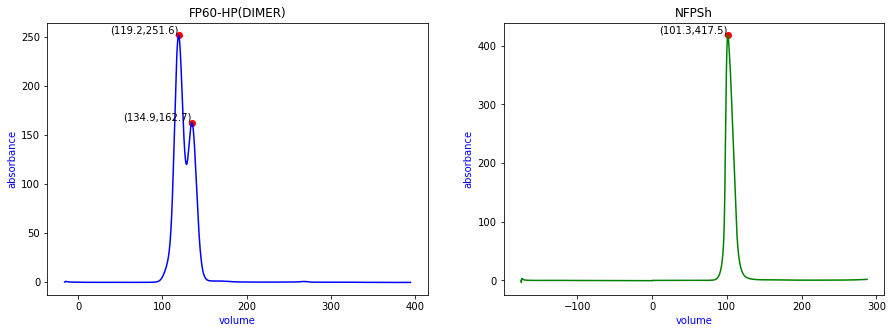

In [48]:
#plotting both the plots 
f = plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(x1,y1, color='blue',linestyle='-')
plt.scatter(peak_x1,peak_y1,color='red')
plt.title('FP60-HP(DIMER)')
plt.xlabel('volume',color='blue')
plt.ylabel('absorbance',color='blue')
for x1,y1 in zip(peak_x1,peak_y1):
	plt.text(x1,y1,'(%.1f,%.1f)'%(x1,y1),ha='right',va='bottom')
#f.savefig('plot1.png')

#f = plt.figure(figsize=(15,5))
plt.subplot(1,2,2)
plt.plot(x2,y2,color='green',linestyle='-')
plt.scatter(peak_x2,peak_y2,color='red')
plt.xlabel('volume',color='blue')
plt.ylabel('absorbance',color='blue')
plt.title('NFPSh')
for x2,y2 in zip(peak_x2,peak_y2):
	plt.text(x2,y2,'(%.1f,%.1f)'%(x2,y2),ha='right',va='bottom')


plt.show()
f.savefig('plots.png')


In [51]:
#Writing a webpage which shows outputs 

f = open('webpage_Nidhi_Project3.html','w')

webpage = """<html>
<style>
body{
                               background: skyblue;
                               color: black;
                               
                           }

                           </style>
<head><h1 style="color:Blue;">Structural analysis of Sulfite Reductase Flavoprotein</h1></head>
<body><p>Sulfite Reducatase Flavoprotein
Sulfite reductase flavoprotein (SiRFP) is a 64kDa monomer unit and can form a 540kDa octamer by oligomerization of its N-terminal first 52 amino acids SiRFP contains the FMN binding flavodoxin (Fld) domain, a FNR (Ferredoxin NADP+ reductase) like NADPH/FAD binding domain and a connection domain which interrupts the FNR domain. A 30 amino-acid long, flexible linker is present, joining the Fld and FAD domains.  SiRFP is a homolog of cytochrome P450 reductase, having its N-terminal in the Fld domain and its C-terminal in the FNR domain. 
    </p>
    <p><h2 style="color:red;">1. Analysis of N-terminus of SiRFP </h2>
    Comparing the SEC chromatogram of N-terminus of SiRFP(NFPSh) with the known molecular wieght dimer (FP60-HP) a</body>
<img src="plots.png" /> 
<p><b>FP60-HP</b>: molecular weight-124kD</p>
<p><b>NFPSh</b>:molecular weight- 22kDa (monomer), 176kDa (octamer)/n
NFPSh has elution volume less than dimer so it is behaving as an <b>octamer</b>
</p>
<p><h2 style="color:red;">2. Finding binding residues for FMN and FAD domains </h2>
</p>
<p> We can find out binding residues with help of inbuilt functions in biopython Bio.PDB module or we can find out our own list of residues by setting cutoff, which means all the residues which are in 10 angstrom region will considered as binding residues. Below are the images showing binding residues from the set cutoff. (You can see zoom in and rotatory images from the output of the function and you can also see the respective amino acid by pointing the mouse on it)
<p><h3>SiRFP model</h3>
<pre>                                    <img  src="SiRFP.png" height="250" /></pre></p>
<p><h3>SiRFP with FAD binding residues in green color</h3>
<pre>                                    <img src="SiRFP_FAD_green.png" height="250"/></pre>
<h3>SiRFP with FMN binding residues in red color</h3>
<pre>                                     <img src="SiRFP_FMN_red.png" height="250"/></pre>
</p></body>
</html>"""

f.write(webpage)
f.close()